In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#%pylab inline

## Exploratory Data Analysis

# Key EDA Questions

* What are the feature names and types?
* Are values missing?
* Which features are continuous and which are categorical?
* What is the distribution of the features?
* What is the distribution of the target?
* How do the features relate to the target?
* How do the variables relate to each other?

In [2]:
cars = pd.read_csv('data/cars_multivariate.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


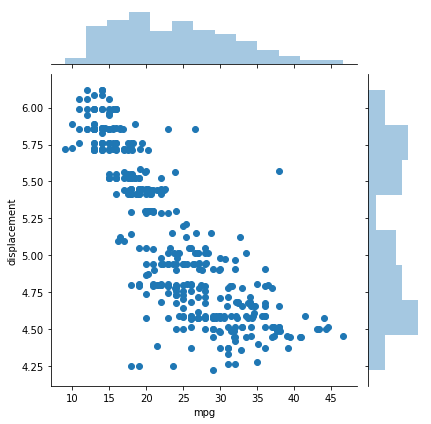

In [3]:
sns.jointplot(x=cars.mpg,y=np.log(cars.displacement))

In [4]:
#can read directly from a website!
#don't though, because (in this case) the website has slightly different data

#cars = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv',sep= ',')
#cars.head()

Start with a very high level overview
- What do the first few rows look like?
- What are the different columns?
- Different data types
- Data summaries

In [5]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
cars.shape

(398, 9)

In [7]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Are there any values missing?

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Do the variable types make sense? Notice that HP has variable type 'object' - this doesn't seem right.

What good are the columns if you don't know what they mean?

How can make conclusions about reasonable values and check our data?

In [9]:
cars['horsepower'].tail()

393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, dtype: object

All the values that we can see look like numbers. Why is horsepower an object then???

In [10]:
#sns.pairplot(cars)

In [11]:
# Force convert horsepower to numeric
pd.to_numeric(cars['horsepower'])

ValueError: Unable to parse string "?" at position 32

In [ ]:
cars['horsepower'].astype(int)

In [ ]:
#Forcibly convert this column to numeric
pd.to_numeric(cars['horsepower'],errors='coerce')

In [ ]:
cars.loc[pd.to_numeric(cars['horsepower'],errors='coerce').isnull()]

errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
If ‘raise’, then invalid parsing will raise an exception
If ‘coerce’, then invalid parsing will be set as NaN
If ‘ignore’, then invalid parsing will return the input

In [12]:
cars['horsepower'] = pd.to_numeric(cars['horsepower'],errors='coerce')

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [13]:
#reload the data but tell it what the na values will look like
cars = pd.read_csv('data/cars_multivariate.csv',sep= ',',na_values='?')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [14]:
# Let's just drop those rows
# notice the switch from isnull() to notnull()
cars = cars.loc[pd.to_numeric(cars['horsepower'],errors='coerce').notnull()]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [15]:
# What about origin? model?
cars.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [16]:
cars['model'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model, dtype: int64

In [17]:
cars['origin'] = cars['origin'].astype(str)
#cars['year'] = cars['year'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null int64
origin          392 non-null object
car_name        392 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 30.6+ KB


Our data set has 5-6 numeric variables and 3-4 categorical variables (cylinders is kind of a wild card). Sometimes it is good to keep track of these:

In [18]:
num_vars = ['mpg','cylinders','displacement','horsepower','weight','acceleration']
cat_vars = ['model', 'origin', 'name']

## More Exploration

### Univariate-Numeric Viz

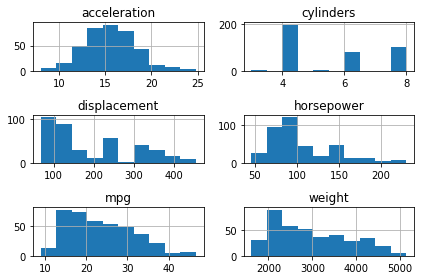

In [19]:
# Histograms
ax = cars[num_vars].hist(bins=10)
plt.tight_layout()

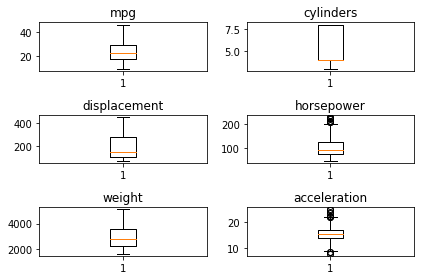

In [20]:
# Boxplots
fig, axes = plt.subplots(3,2)
for ax, var in zip(axes.ravel(), num_vars):
    ax.boxplot(cars[var])
    ax.set_title(var)
plt.tight_layout()

In [21]:
axes.ravel().shape

(6,)

In [22]:
axes.shape

(3, 2)

In [23]:
import seaborn as sns

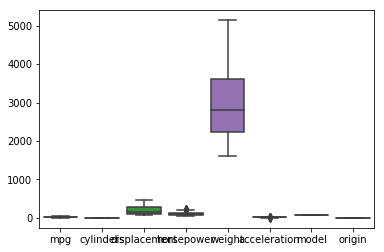

In [24]:
sns.boxplot(data=cars)

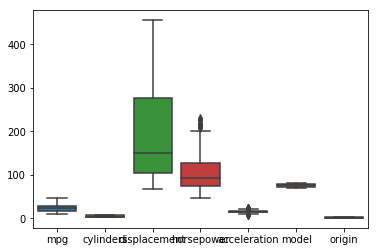

In [25]:
sns.boxplot(data=cars.drop('weight',1))

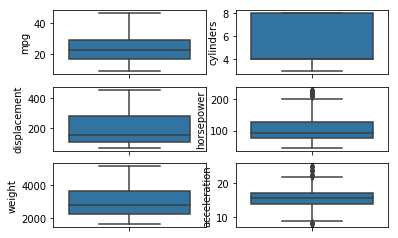

In [26]:
# Boxplots
fig, axes = plt.subplots(3,2)
for ax, var in zip(axes.ravel(), num_vars):
    sns.boxplot(y=var,data=cars,ax=ax)
    #sns.set_title(var)

In [27]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Univariate - Categorical

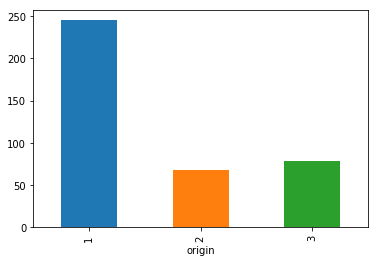

In [28]:
# Categorical
agg = cars.groupby('origin').apply(len)
agg.plot(kind='bar')

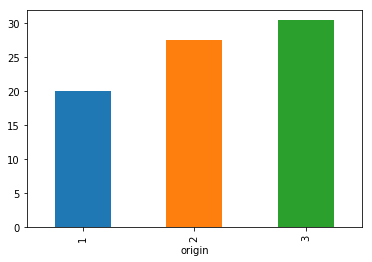

In [29]:
# Categorical vs Numeric
agg = cars.groupby('origin')['mpg'].mean()
agg.plot(kind='bar')

In [30]:
agg = cars.groupby(["origin","cylinders"])["mpg"].mean()
agg

origin  cylinders
1       4            28.013043
        6            19.645205
        8            14.963107
2       4            28.106557
        5            27.366667
        6            20.100000
3       3            20.550000
        4            31.595652
        6            23.883333
Name: mpg, dtype: float64

In [31]:
agg = agg.unstack()
agg

cylinders,3,4,5,6,8
origin,,,,,
1,NaN,28.013043,NaN,19.645205,14.963107
2,NaN,28.106557,27.366667,20.100000,NaN
3,20.55,31.595652,NaN,23.883333,NaN


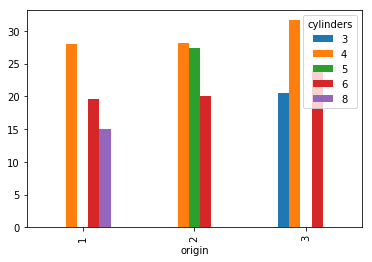

In [32]:
agg.plot(kind="bar")
plt.show()

In [33]:
# # Categorical vs categorical vs numeric
# agg = cars.groupby(['origin','cylinders'])['mpg'].mean()
# print(agg)
# agg = agg.unstack(level='cylinders')
# print(agg)
# agg.plot(kind='bar')

### Numeric vs Numeric

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


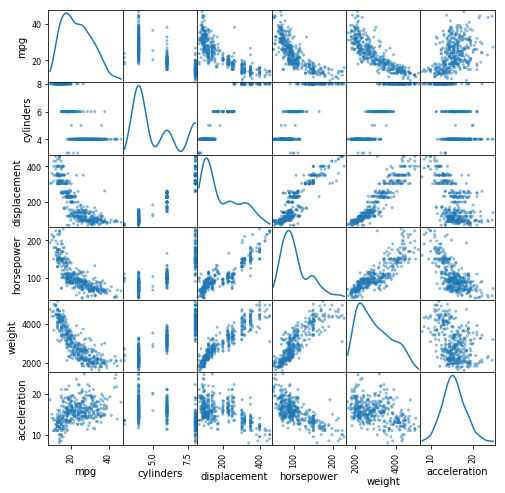

In [34]:
# Scatterplot matrix
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(cars[num_vars],figsize=(8,8),diagonal = 'kde')


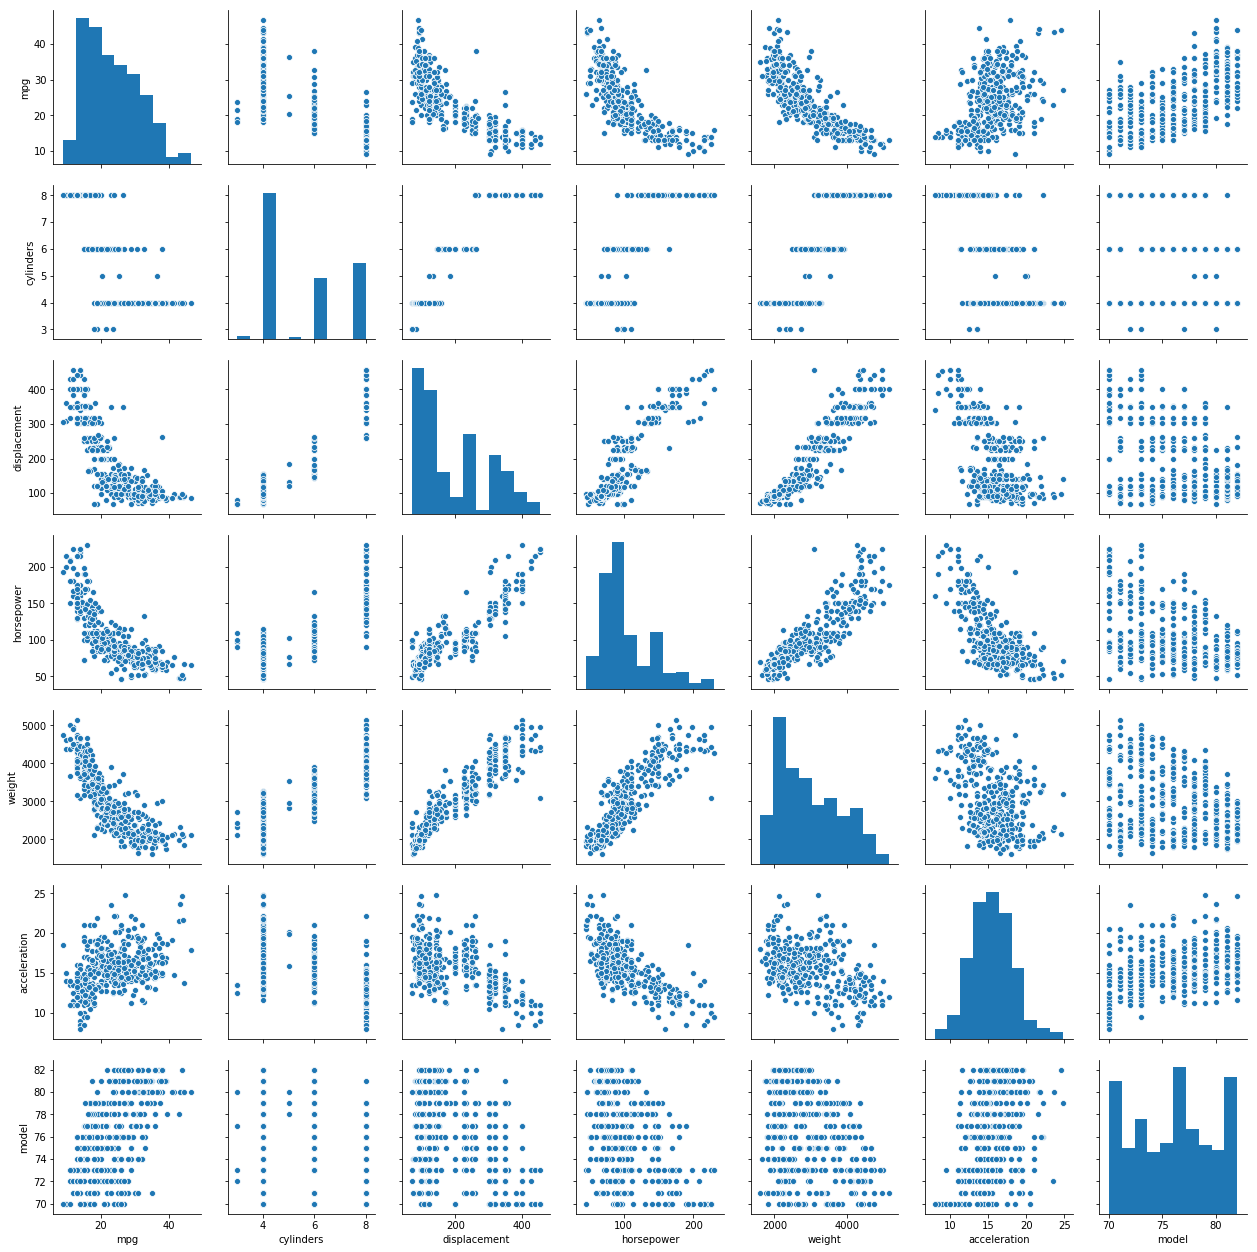

In [35]:
sns.pairplot( cars[["mpg","cylinders","displacement","horsepower","weight","acceleration","model"]] )

In [36]:
pd.cut( cars.acceleration, bins=7 ).head()

0    (10.4, 12.8]
1    (10.4, 12.8]
2    (10.4, 12.8]
3    (10.4, 12.8]
4    (10.4, 12.8]
Name: acceleration, dtype: category
Categories (7, interval[float64]): [(7.983, 10.4] < (10.4, 12.8] < (12.8, 15.2] < (15.2, 17.6] < (17.6, 20.0] < (20.0, 22.4] < (22.4, 24.8]]

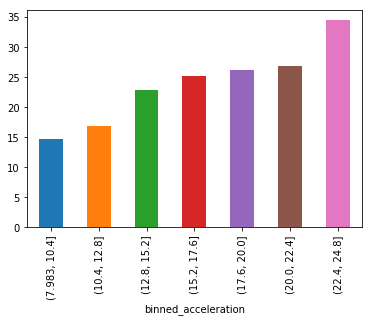

In [37]:
# Use binning to see relationships more clearly
cars['binned_acceleration'] = pd.cut(cars.acceleration, bins=7)
agg = cars.groupby('binned_acceleration')['mpg'].mean()
agg.plot(kind='bar')

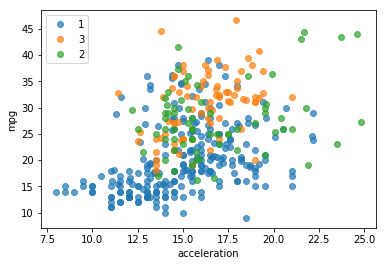

In [38]:
# Scatter plot by category
origins = cars['origin'].unique()
for origin in origins:
    plt.plot(cars.loc[cars.origin==origin,'acceleration'], 
             cars.loc[cars.origin==origin,'mpg'], 
             linestyle='',
             marker='o',
             alpha=.7,
             label=origin)
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend(numpoints=1)
    

In [39]:
# Categorical vs Categorical
pd.crosstab(cars['origin'], cars['model'])


model,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
1,22,19,18,29,14,20,22,18,22,23,6,13,19
2,5,4,5,7,6,6,8,4,6,4,8,3,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9


Aha! Model means model year --- we probably should have left this as numeric

Text(0.5,1,'MPG by origin and model year')

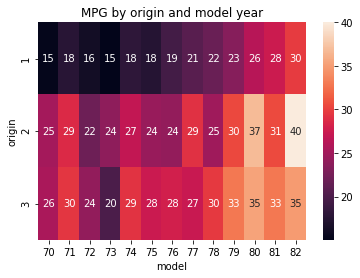

In [40]:
# Heat-map
import seaborn as sns

agg = cars.groupby(['origin','model'])['mpg'].mean()
ax = sns.heatmap(agg.unstack(level='model'), annot=True)
ax.set_title('MPG by origin and model year')

In [41]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name', 'binned_acceleration'],
      dtype='object')

In [42]:
cars2 = pd.melt(cars.drop(['car_name','weight'],1), id_vars=["model", "origin"], var_name="Stat")

In [43]:
cars2.Stat.unique()

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration',
       'binned_acceleration'], dtype=object)

In [44]:
cars2.head()

,model,origin,Stat,value
0,70,1,mpg,18
1,70,1,mpg,15
2,70,1,mpg,18
3,70,1,mpg,16
4,70,1,mpg,17


## Linear Regression

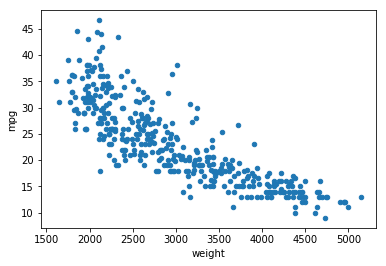

In [45]:
# Single variable regression
cars.plot('weight','mpg',kind='scatter')

We want to model this with a linear relationship the general form of which is:

$y = mx + b$

For the sake of generalization, you can express this relationship as a single linear relationship:

$ y = Mx $

Where `M` is a row vector 
```
[[m,b]]
 ```
 
and `x` is a column vector
```
[[x],
 [1]]
```

Let's suppose a slope `m=-0.001` and `b=35`

In [46]:
m, b = -0.001, 35
M = np.array([[m,b]])

In [47]:
x = np.stack( (cars.weight, np.ones_like(cars.weight)) )
x

array([[3.504e+03, 3.693e+03, 3.436e+03, 3.433e+03, 3.449e+03, 4.341e+03,
        4.354e+03, 4.312e+03, 4.425e+03, 3.850e+03, 3.563e+03, 3.609e+03,
        3.761e+03, 3.086e+03, 2.372e+03, 2.833e+03, 2.774e+03, 2.587e+03,
        2.130e+03, 1.835e+03, 2.672e+03, 2.430e+03, 2.375e+03, 2.234e+03,
        2.648e+03, 4.615e+03, 4.376e+03, 4.382e+03, 4.732e+03, 2.130e+03,
        2.264e+03, 2.228e+03, 2.634e+03, 3.439e+03, 3.329e+03, 3.302e+03,
        3.288e+03, 4.209e+03, 4.464e+03, 4.154e+03, 4.096e+03, 4.955e+03,
        4.746e+03, 5.140e+03, 2.962e+03, 2.408e+03, 3.282e+03, 3.139e+03,
        2.220e+03, 2.123e+03, 2.074e+03, 2.065e+03, 1.773e+03, 1.613e+03,
        1.834e+03, 1.955e+03, 2.278e+03, 2.126e+03, 2.254e+03, 2.408e+03,
        2.226e+03, 4.274e+03, 4.385e+03, 4.135e+03, 4.129e+03, 3.672e+03,
        4.633e+03, 4.502e+03, 4.456e+03, 4.422e+03, 2.330e+03, 3.892e+03,
        4.098e+03, 4.294e+03, 4.077e+03, 2.933e+03, 2.511e+03, 2.979e+03,
        2.189e+03, 2.395e+03, 2.288e+0

In [48]:
y_pred = M @ x

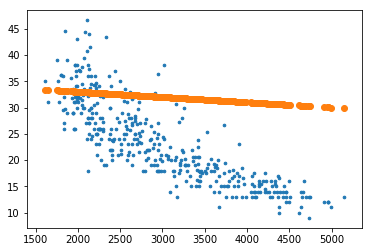

In [49]:
plt.scatter(cars.weight , cars.mpg, s = 7)
plt.scatter(cars.weight, y_pred )

In [50]:
residuals = y_pred[0] - cars.mpg

In [51]:
loss = (residuals**2).sum()

In [52]:
loss

48620.528289

In [54]:
m, b = -0.003, 35
M = np.array([[m,b]])

y_pred = M @ x

residuals = ((y_pred[0] - cars.mpg)**2).sum()
residuals

16107.557800999999

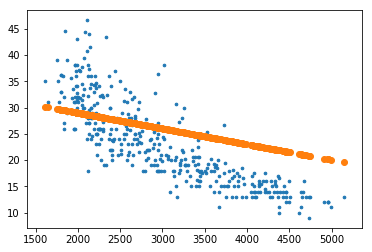

In [56]:
plt.scatter(cars.weight , cars.mpg, s = 7)
plt.scatter(cars.weight, y_pred )

In [69]:
y = np.array(cars.mpg).reshape(-1,1)

```
xb = y

[n,2] * [2,1] = [n,1]
```

In [70]:
x.shape, y.shape

((2, 392), (392, 1))

In [72]:
M, res, rank, s = np.linalg.lstsq(x.T, y )
M

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[-7.64734254e-03],
       [ 4.62165245e+01]])

In [73]:
#m, b = -0.003, 35
#M = np.array([[m,b]])

y_pred = M.T @ x

residuals = ((y_pred[0] - cars.mpg)**2).sum()
residuals

7321.233706188365

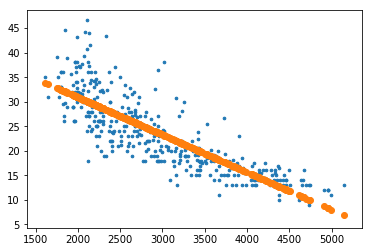

In [74]:
plt.scatter(cars.weight , cars.mpg, s = 7)
plt.scatter(cars.weight, y_pred )

Linear regression is just the fancy term for finding the line of best fit. If I was going to eyeball it from this data, I would draw the line from (1000,40) through (5500,5).

In other words, we are looking for the slope and intercept that defines a line that fits the data as well as possible.

'As well as possible' means that we are trying to minimize the mean-squared-error

(1000, 5500)

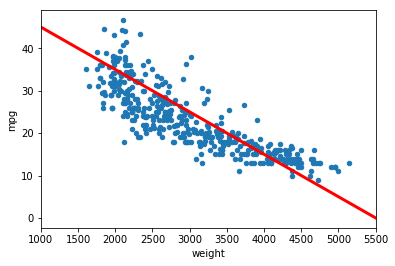

In [49]:
# Make a guess at the line of best fit
first_point = [1000,45]
second_point = [5500, 0]

# Solve 
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    X = [[p1[0], 1], [p2[0], 1]]
    y = [[p1[1]], [p2[1]]]
    soln = np.linalg.solve(X,y)
    return  soln[0][0], soln[1][0]

slope, intercept = get_line_equation(first_point, second_point)


# Plot the line along with the data
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])

How can we measure the error? The typical choice is to use mean squared error. The error for a given data point is the difference between the observed value and the predicted value
$$
MSE := \frac{1}{n} \sum_{i=1}^n (y_i - (mx_i + b))^2
$$


In [50]:
# Mean Squared Error

def mean_squared_error(X, y, m, b):
    """
    Compute the mean squared error, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    pred = X*m + b
    error = y - pred
    mse = np.mean(error**2)
    return mse

mean_squared_error(cars['weight'], cars['mpg'], slope, intercept)

25.821981887755086

## R-Squared

Mean squared error is a good error metric, but it is not comparable across different data sets. For this we use a scaled version called $R^2$. 
\begin{align}
    R^2 &:= 1 - \frac{SS_{res}}{SS_{tot}} \\
    &= 1 - \frac{\sum_{i=1}^n (y_i - (mx_i + b))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    

Where $SS_{res}$ is the sum of the squared residuals and $SS_{tot}$ is the total sum of squares. $R^2$ can be interpreted as the fraction of the variance in the data that is explained by the model.

In [51]:
# Calculate r-squared

def r_squared(X, y, m, b):
    """
    Compute the r-squared, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    pred = X*m + b
    resid = y - pred
    rsquared = 1 - np.sum(resid**2)/np.sum((y-y.mean())**2)
    return rsquared

r_squared(cars['weight'], cars['mpg'], slope, intercept)
    

0.5750359093465012

## Ordinary least squares
It turns out that we can find the slope and intercept which *minimize* the mean squared error, using a procedure called ordinary least squares

Ordinary least squares is implemented in the statsmodels package. The advantage of this package is that we also have access to a number of *regression diagnostics.* 

In [52]:
import statsmodels.api as sm

# Choose the predictor and add a constant term
# (allow for an intercept)
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X)
y = cars['mpg']

# Create a linear regression object
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          6.02e-102
Time:                        13:00:30   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Diagnostics

**coef** - The values of the coefficients in the model

**$P>|t|$** - The p-value of the null hypothesis that a specific parameter is zero.

**R-Squared** - Proportion of variance explained by the model. Measured on a scale from 0 (bad) to 1 (good)

**Prob (F-statistic)** - p-value of the F-statistic. This is the probability of the null hypothesis that *all parameters in the model are zero*

(1000, 5500)

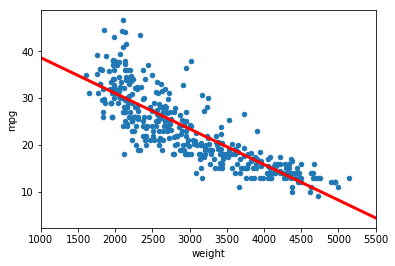

In [53]:
# Plot the line along with the data
slope = -.0076
intercept = 46.2165
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])